# Análisis predictorio de pacientes con insufiencia cardíaca
#### Delgado Agustina

Fuente https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

El dataset contiene las siguientes variables:
1. Age: age of the patient [years]
2. Sex: sex of the patient [M: Male, F: Female]
3. ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4. RestingBP: resting blood pressure [mm Hg]
5. Cholesterol: serum cholesterol [mm/dl]
6. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7. RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
9. ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
10. Oldpeak: oldpeak = ST [Numeric value measured in depression]
11. ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
12. HeartDisease: output class [1: heart disease, 0: Normal]

## Importamos las librerías y los datos

In [48]:
#Importamos librerías
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#Importamos el dataset
#Fuente https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction
df = pd.read_csv('heart.csv', engine = 'python')

#Pasamos todas las letras a minúscula para mayor practicidad
df.columns = df.columns.str.strip().str.lower()

In [3]:
df.head()

,age,sex,chestpaintype,restingbp,cholesterol,fastingbs,restingecg,maxhr,exerciseangina,oldpeak,st_slope,heartdisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## Análisis exploratorio de datos EDA

In [4]:
#comprobamos que no haya datos nulos
df.isna().sum()

age               0
sex               0
chestpaintype     0
restingbp         0
cholesterol       0
fastingbs         0
restingecg        0
maxhr             0
exerciseangina    0
oldpeak           0
st_slope          0
heartdisease      0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             918 non-null    int64  
 1   sex             918 non-null    object 
 2   chestpaintype   918 non-null    object 
 3   restingbp       918 non-null    int64  
 4   cholesterol     918 non-null    int64  
 5   fastingbs       918 non-null    int64  
 6   restingecg      918 non-null    object 
 7   maxhr           918 non-null    int64  
 8   exerciseangina  918 non-null    object 
 9   oldpeak         918 non-null    float64
 10  st_slope        918 non-null    object 
 11  heartdisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
#Vemos cuántos valores hay en heartdisease, la variable a predecir
print(df['heartdisease'].value_counts())

1    508
0    410
Name: heartdisease, dtype: int64


In [7]:
df.describe()

,age,restingbp,cholesterol,fastingbs,maxhr,oldpeak,heartdisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


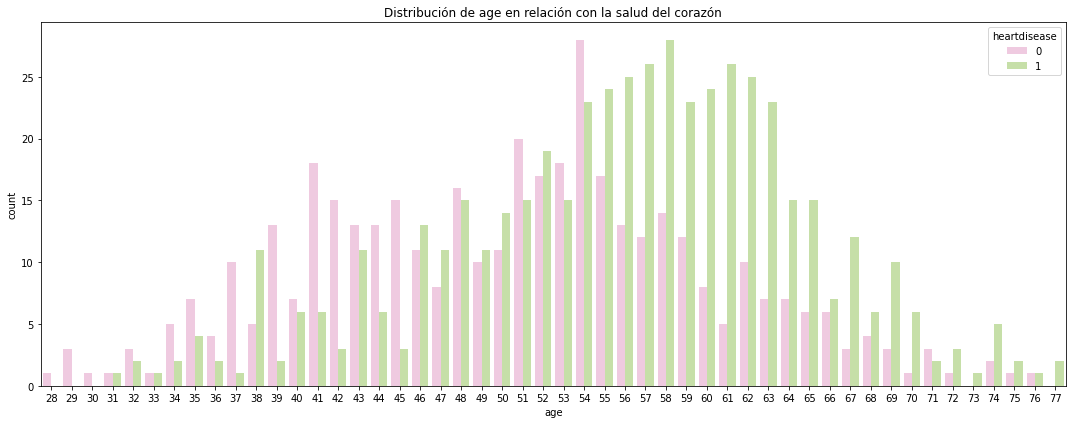

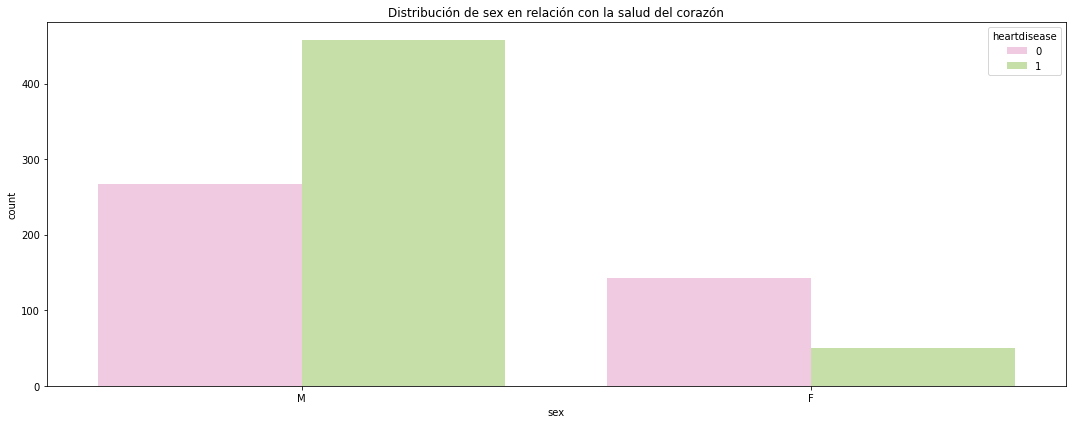

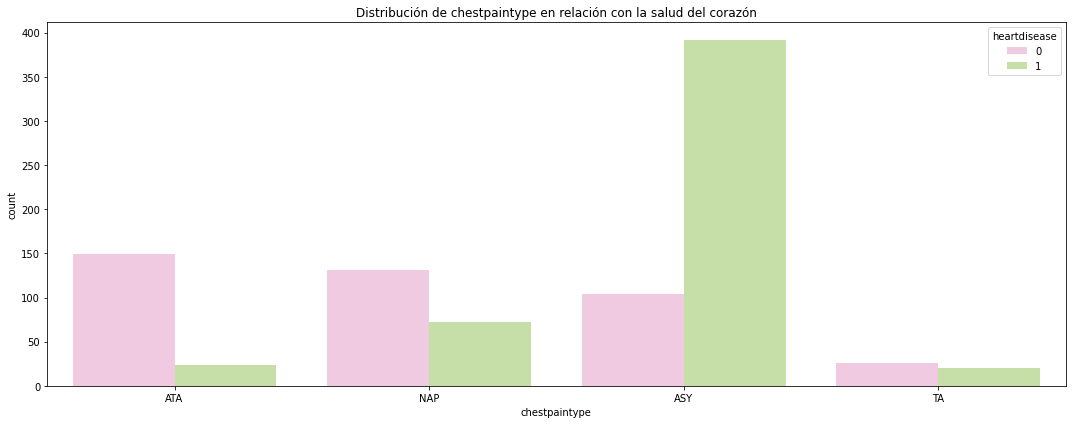

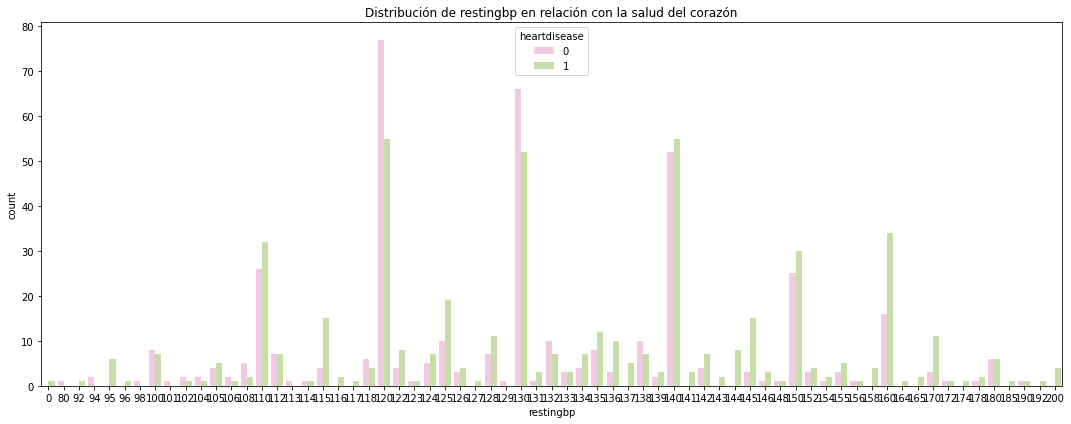

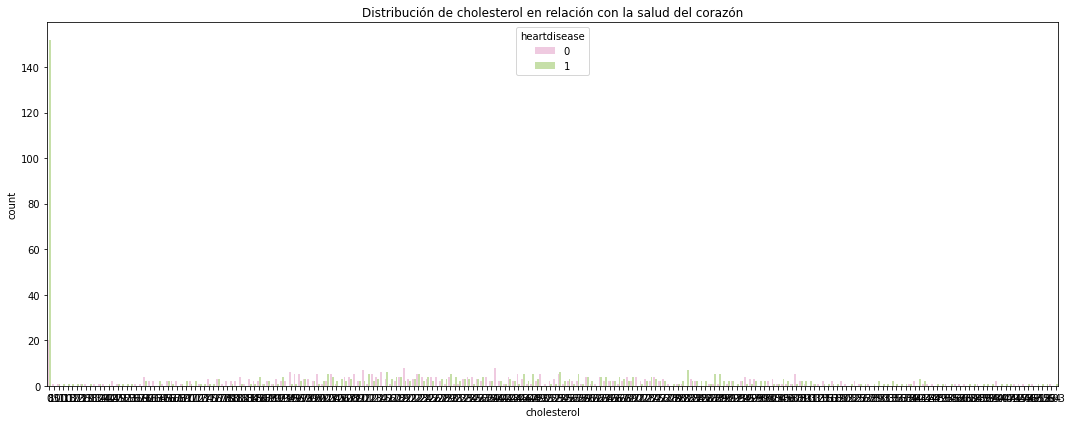

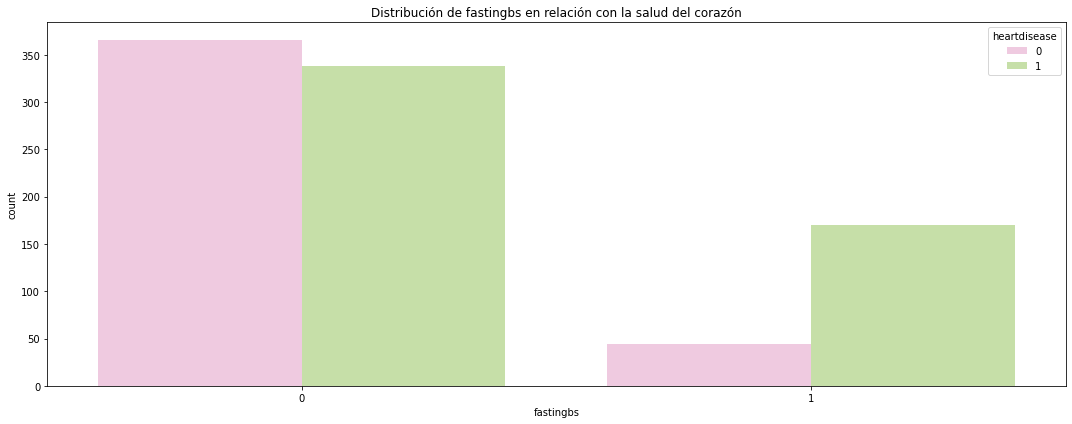

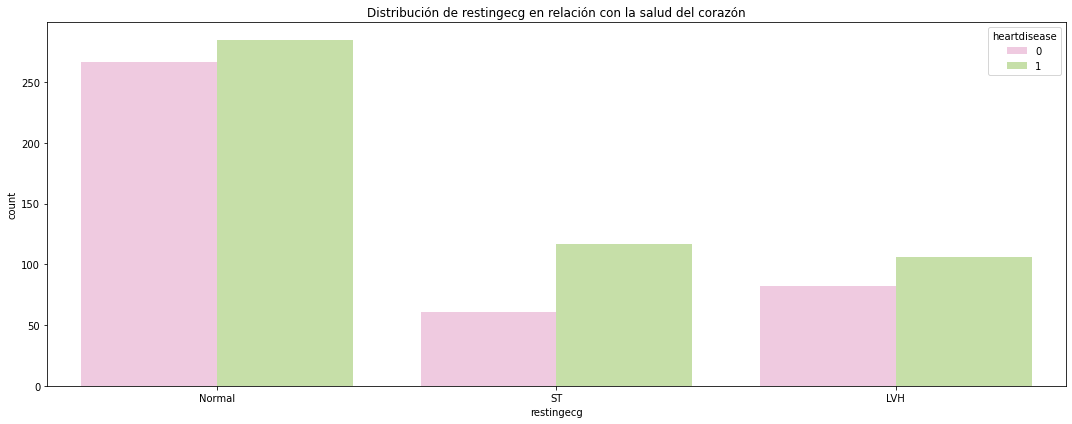

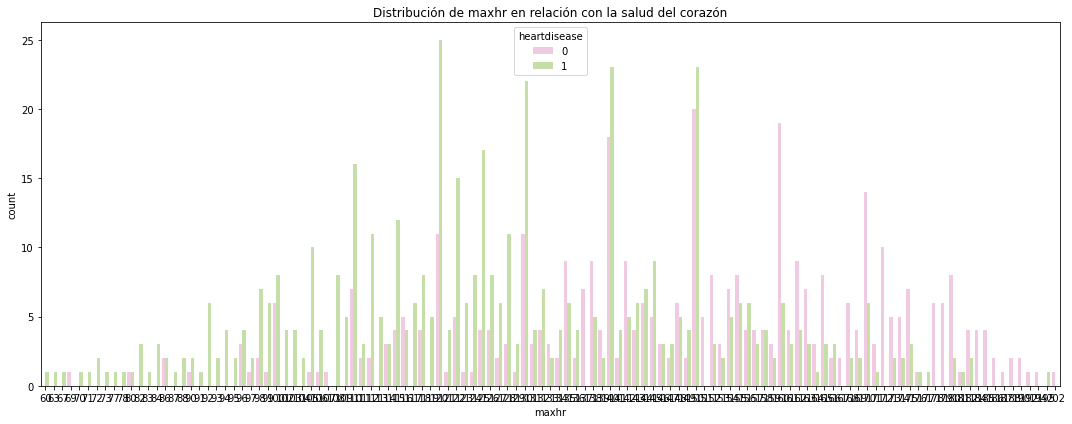

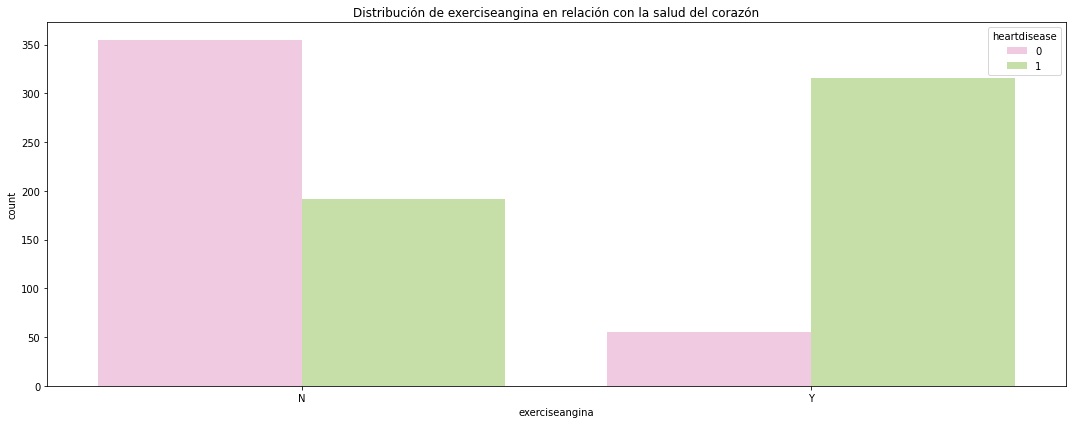

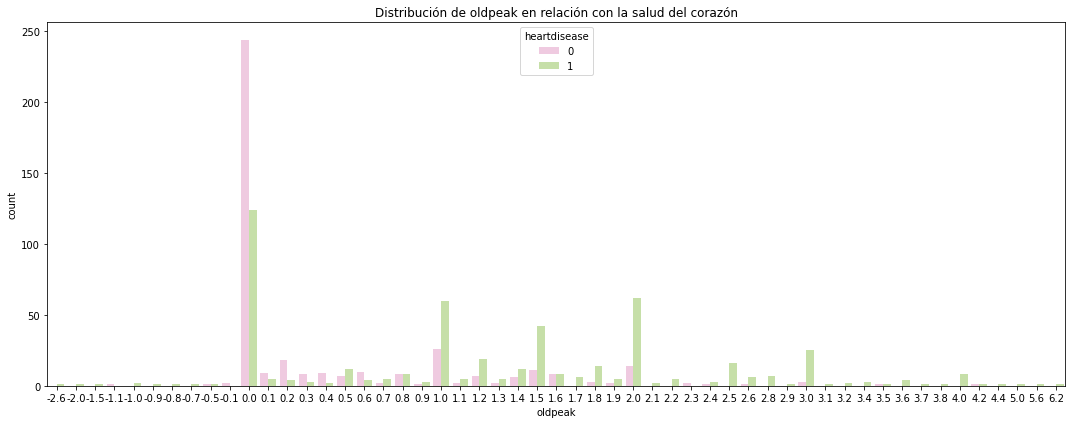

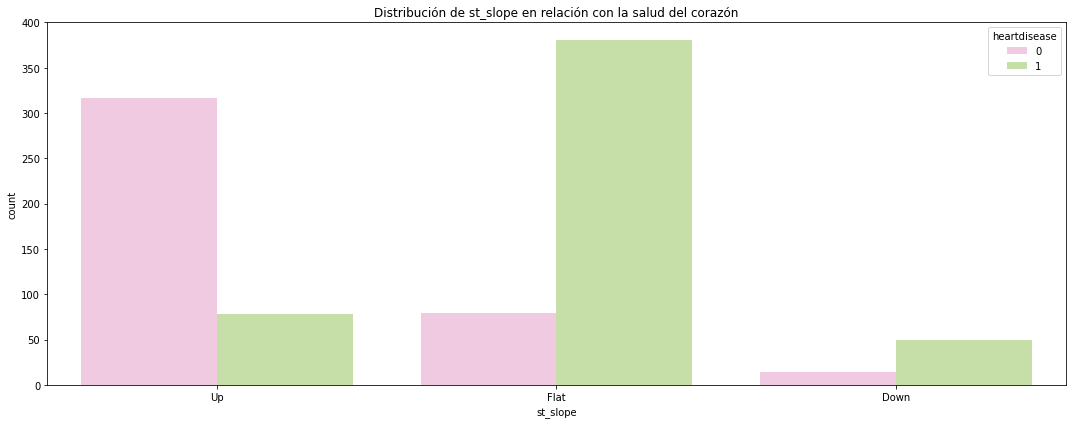

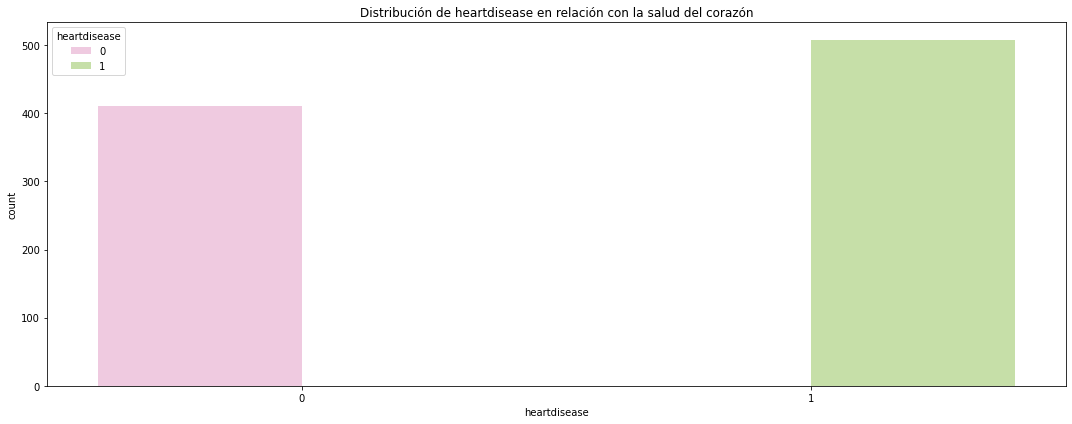

In [56]:
for feature in df.columns:
    plt.figure(figsize=(15,6))
    sns.countplot(x=df[feature],data = df, hue = 'heartdisease', palette='PiYG')
    plt.title(f'Distribución de {feature} en relación con la salud del corazón')
    plt.xlabel(f"{feature}")
    plt.tight_layout()
    plt.show()
    

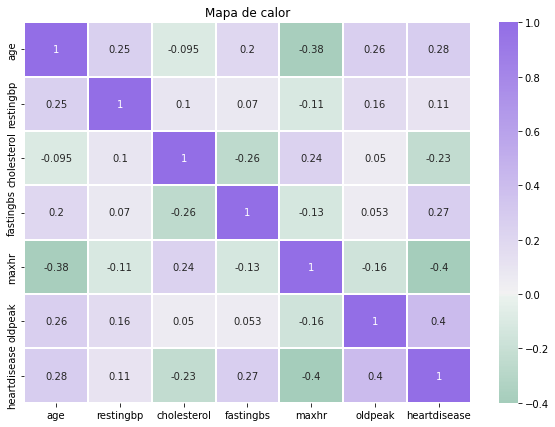

In [11]:
# Definimos el color del mapa de calor 
colors = sns.diverging_palette(150, 275, s=80, l=55, n=9, as_cmap=True)

# Creamos un heatmap
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), center=0, annot = True, cmap=colors, robust=True, linewidths=.1)
plt.title('Mapa de calor')
plt.show()

# Arbol de decisión

In [12]:
#Convertimos las variables str a numeros binarios
df_dummies=pd.get_dummies(data=df, drop_first=True)

In [13]:
#Seleccionamos variables
# Variables predictoras
X = df_dummies.drop(columns='heartdisease')
# Variable objetivo a predecir
Y = df_dummies.heartdisease

In [14]:
#Dividimos los datos en training y testing
x_train, x_test, y_train, y_test = train_test_split(X,Y, random_state=0, test_size=0.2)

### Parametros max_depth y ccp_alpha más precisos

Inicialmente trabajé el árbol con una profundidad (max_depth) de 4, sin considerar cuál es la profundidad que más precisión me brinda. Para mejorar esto, cree un bucle que va ajustando y testeando modelo cambiando los valores del parámetro max_dep. Luego, calcula el resultado de la precisión con cada valor. Finalmente, guarda las precisiones en la lista llamada prec_depth, para luego buscar la mayor precisión resultante y utilizar el valor correspondiente en el parámetro max_depth.

Se realizará el mismo proceso para encontrar el valor de ccp_alpha más preciso. Inicialmente se trabajó con ccp_alpha = 0.01
Fuente https://www.codecademy.com/paths/data-science/tracks/dsml-supervised-learning-i/modules/mle-decision-trees

In [15]:
#Lista de valores para max_depth, de 1 a 20
depths = range(1, 21)
#Lista para guardar precisiones
precision_depth = []
#Creamos un bucle para testear diferentes valores en max_depth
for i in depths:
    dt = DecisionTreeClassifier(max_depth=i, criterion='gini')
    dt.fit(x_train, y_train)
    precision_depth.append(dt.score(x_test, y_test))
    
print(precision_depth)

[0.7608695652173914, 0.8043478260869565, 0.8152173913043478, 0.8206521739130435, 0.8260869565217391, 0.8097826086956522, 0.8315217391304348, 0.8152173913043478, 0.8152173913043478, 0.7554347826086957, 0.782608695652174, 0.7989130434782609, 0.7880434782608695, 0.7934782608695652, 0.7771739130434783, 0.7771739130434783, 0.7554347826086957, 0.7554347826086957, 0.7663043478260869, 0.7663043478260869]


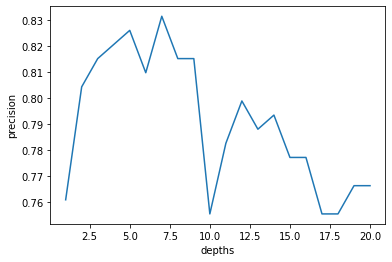

In [16]:
#Graficamos cada pecision con su profundidad
plt.plot(depths, precision_depth)
plt.xlabel('depths')
plt.ylabel('precision')
plt.show()


In [25]:
#Utilizamos np.max() para encontrar la mayor precision
max_precision_depth = np.max(precision_depth)

#Para encontrar la relación de los valores de precisión guardados en prec_depth y su correspondiente en depths, utilizamos la función numpy.argmax() 
#numpy.argmax() devuelve los índices de valores con los valores más altos de el array brindado
mejor_depth = depths[np.argmax(precision_depth)]
print(f'Mayor precision {round(max_precision_depth,3)} con max_depth = {mejor_depth}')

Mayor precision 0.832 con max_depth = 7


In [18]:
#Se repite el proceso con ccp_alpha

#Lista para guardar precisiones
precision_ccp = []
ccp = np.logspace(-3, 0, num=20) 
#Creamos un bucle para testear diferentes valores en ccp_alpha
for i in ccp:
    dt_prune = DecisionTreeClassifier(random_state = 1, max_depth = mejor_depth, ccp_alpha=i)
    dt_prune.fit(x_train, y_train)
    precision_ccp.append(dt_prune.score(x_test, y_test))
    
print(precision_ccp)

[0.8315217391304348, 0.8260869565217391, 0.8260869565217391, 0.8260869565217391, 0.8206521739130435, 0.7989130434782609, 0.8043478260869565, 0.8043478260869565, 0.8043478260869565, 0.7608695652173914, 0.7608695652173914, 0.7608695652173914, 0.7608695652173914, 0.7608695652173914, 0.7608695652173914, 0.5815217391304348, 0.5815217391304348, 0.5815217391304348, 0.5815217391304348, 0.5815217391304348]


In [28]:
#Utilizamos np.max() para encontrar la mayor precision
max_precision_ccp = np.max(precision_ccp)

mejor_ccp = ccp[np.argmax(precision_ccp)]
print(f'Mayor precision {round(max_precision_ccp,3)} con ccp_alpha = {mejor_ccp}')

Mayor precision 0.832 con ccp_alpha = 0.001


In [31]:
#Llamamos al constructor del arbol de decision
dt = DecisionTreeClassifier(max_depth= mejor_depth, ccp_alpha= mejor_ccp,criterion='gini')

#Entrenamos el modelo
arbol_enfermedad = dt.fit(x_train, y_train)
arbol_enfermedad


DecisionTreeClassifier(ccp_alpha=0.001, max_depth=7)

### Predicción

In [32]:
#Calculamos la predicción para todos los pacientes
y_pred = arbol_enfermedad.predict(x_test)
y_pred

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1])

### Precisión

In [35]:
#Calculamos la precision
#print(dt.score(x_test, y_test))
print(f'Precision el modelo con el criterio de Gini: {accuracy_score(y_test, y_pred)}')

Precision el modelo con el criterio de Gini: 0.8315217391304348


Precision inicial, previo a calcular los parámetros más precisos de DecisionTreeClassifier, con los valores max_depth=4, ccp_alpha=0.01 =

0.8043478260869565

### Matriz de confusion

In [22]:
#importamos la librería
from sklearn.metrics import confusion_matrix
#Creamos la matriz de confusion
cm = confusion_matrix(y_test, y_pred)
print(f"Matriz de confusión del árbol de decisión: \n {cm}")

Matrizde confusión del árbol de decisión: 
 [[53 24]
 [12 95]]


Podemos ver que tenemos un resultado de:
53 verdaderos positivos, 95 verdaderos negtivos, 24 falsos positivos, 12 falsos negativos

### Recall

In [36]:
from sklearn.metrics import recall_score

recall = recall_score(y_test, y_pred)

print(f"Recall del árbol de decisión: {recall}")

Recall del árbol de decisión: 0.8598130841121495


### F1 score

In [24]:
#Importamos librerías
from sklearn.metrics import f1_score

#F1 score
score = f1_score(y_pred, y_test)

print (f"Decision Tree F1 score: {score}")

Decision Tree F1 score: 0.8407079646017699


### Gráfico del árbol

#### Nota aclarativa
Por alguna razón que no logro ubicar, al poner el parámetro class_names= list(Y.values) en el plot_tree me salía el error TypeError: can only concatenate str (not "numpy.int64") to str.
Lo solucioné con class_names= list(str(Y.values)).Pero, en el gráfico me cambió los valores de 1 por " \[ ". Busqué cuál será el error.

Empezando por Y.value_counts()

Output:

1    508

0    410

Name: heartdisease, dtype: int64

No hay valores nulos

Continué con list(Y.values), resultando sin anomalías.

Por último, str(Y.values), lo únco raro que se aprecia es el carácter \n, pero sólo indica el salto de línea. 

Decido continuar con las clases "enfermo" y "sano"


|--- feature_14 <= 0.50
|   |--- feature_4 <= 151.00
|   |   |--- feature_6 <= 0.50
|   |   |   |--- feature_0 <= 65.50
|   |   |   |   |--- feature_1 <= 132.00
|   |   |   |   |   |--- feature_3 <= 0.50
|   |   |   |   |   |   |--- feature_12 <= 0.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_12 >  0.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_3 >  0.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_1 >  132.00
|   |   |   |   |   |--- feature_0 <= 53.50
|   |   |   |   |   |   |--- feature_7 <= 0.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_7 >  0.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_0 >  53.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  65.50
|   |   |   |   |--- class: 0
|   |   |--- feature_6 >  0.50
|   |   |   |--- feature_1 <= 86.00
|   |   |   |   |--- class: 0
|   |   |   |--- feature_1 

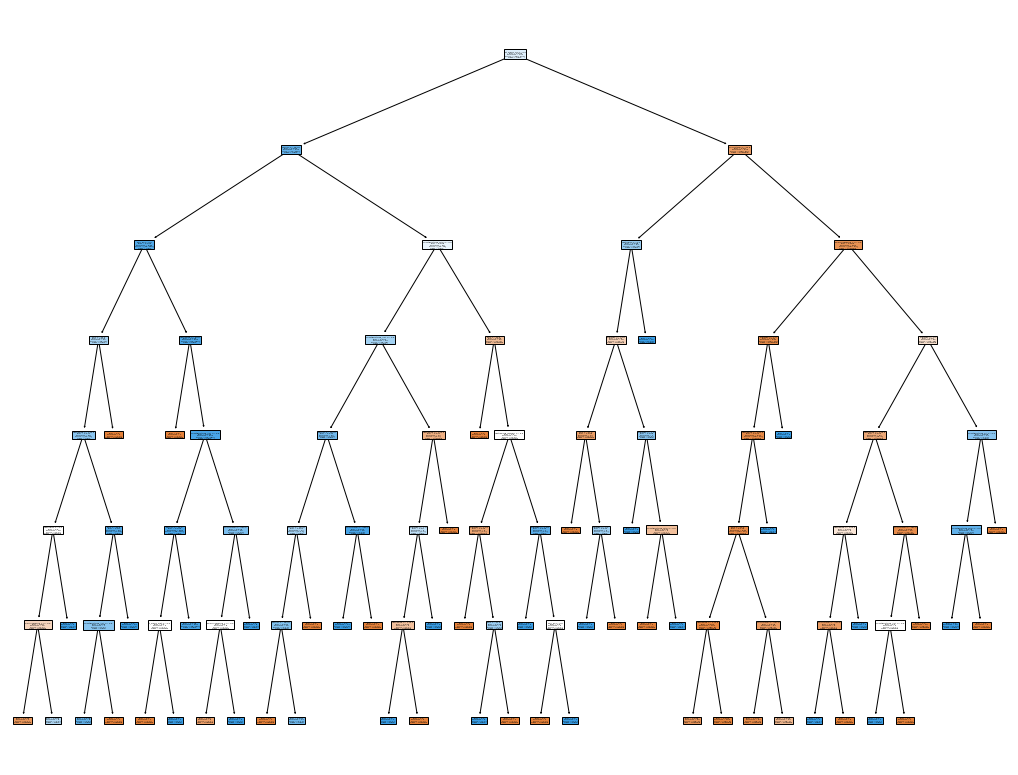

In [62]:
#Realizamos el gráfico del árbol
plt.figure(figsize=(18, 14)) #dimensiones del gráfico
tree.plot_tree(arbol_enfermedad, feature_names = list(x_train.columns.values), class_names= ['enfermo', 'sano'], filled=True)
print(tree.export_text(arbol_enfermedad))

In [21]:
#Generamos una muestra
muestra = X.sample()
muestra

,age,restingbp,cholesterol,fastingbs,maxhr,oldpeak,sex_M,chestpaintype_ATA,chestpaintype_NAP,chestpaintype_TA,restingecg_Normal,restingecg_ST,exerciseangina_Y,st_slope_Flat,st_slope_Up
58,54,150,365,0,134,1.0,1,0,0,0,0,1,0,0,1


In [23]:
#Calculamos la probabilidad con la función predict_proba
dt.predict_proba(muestra)

array([[0.92771084, 0.07228916]])